<a href="https://colab.research.google.com/github/amthreeh/healthnutrition/blob/main/%5Bhr%5D%EC%84%B1%EB%B3%84%EA%B3%BC_%EC%A7%88%EB%B3%91%EA%B0%84%EC%9D%98_%EA%B4%80%EA%B3%84_%EB%B0%8F_%EC%B0%A8%EC%9D%B4%EC%A0%90_%EC%9E%84%EC%A7%80%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [3]:
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


#데이터 가져오기

In [4]:
%cd /content/drive/MyDrive/nationalhealth-main

/content/drive/MyDrive/nationalhealth-main


In [5]:
df = pd.read_csv('/content/drive/MyDrive/nationalhealth-main/nationalhealth_2010to2021.csv')
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [6]:
df.columns.tolist()

['ID',
 'ID_fam',
 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 '

# 변수정리

- EC 직업과 관련된 문항
job_check = df['EC1_1','EC_wht_23','EC_wht_5','EC_pedu_1','EC_pedu_2']
- BD 음주와 흡연과 관련된 
drunk_check = df['BD1_11','BD2_1','BD2_31','dr_month','BS3_1']
- BP 정신적 스트레스와 관련된 문항
mental_stress = df['BP6_10','BP7','mh_stress']
- BE 신체적 활동(운동)과 관련된 문항
exercise = df['BE3_31','BE5_1']
- LW 출산 여부와 관련된 문항
childbirth_check = df['LW_mt','LW_mt_a1','LW_br']
- 개인아이디 가구아이디 조사연도 17개시도 동/읍면구분 성별 나이 소득분위 교육수준 
- incm과 관련된문항 소득분위
income_check = 
- HE와 관련된문항  #건강검진부분
phisical_check = 
- N과관련된 문항 #1일 영양소섭취와 관련된문항
nutrient_intake = 
- EC와 경제수준과 관련된문항 -->


#질병 : 
'비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증'

#성별에 따른 신체/질병 관련 특성

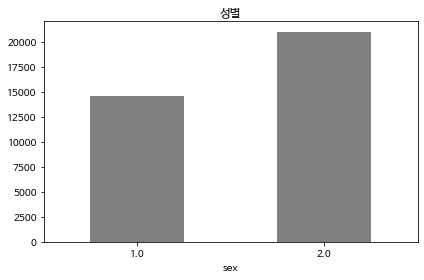

In [7]:
sex = df.groupby('sex').size()

sex.plot(color='grey', kind='bar', rot=0)
plt.title("성별")
plt.tight_layout()

In [8]:
men = df[df['sex']==1]['sex']
men.value_counts()

1.0    14620
Name: sex, dtype: int64

In [9]:
men = df[df['sex']==1]['year']
men.value_counts()

2019.0    1527
2011.0    1465
2018.0    1458
2017.0    1451
2021.0    1352
2012.0    1337
2016.0    1258
2020.0    1171
2013.0    1166
2015.0    1131
2014.0    1098
2010.0     206
Name: year, dtype: int64

In [10]:
women = df[df['sex']==2]['year']
women.value_counts()

2019.0    2149
2011.0    2146
2018.0    2107
2017.0    2014
2012.0    1994
2016.0    1910
2021.0    1909
2013.0    1714
2020.0    1644
2014.0    1624
2015.0    1615
2010.0     183
Name: year, dtype: int64

남성과 여성의 차이:
2021년에는 남성들의 발병률이 여성보다 높았음

In [11]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    men = df[df['sex']==1][feature].value_counts()
    women = df[df['sex']==2][feature].value_counts()
    data = pd.DataFrame([men, women])
    data.index = ['men','women']
    data.plot(kind='bar',stacked=True)

In [12]:
df_sex = df[df['우울증'] == 1].sex.value_counts()/sex
df_sex

1.0    0.023940
2.0    0.067828
dtype: float64

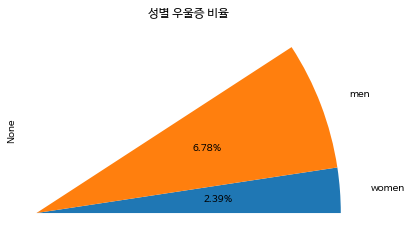

In [13]:
df_sex = df[df['우울증'] == 1].sex.value_counts()/sex
labels = ['women', 'men']
df_sex.plot.pie(labels = labels, autopct='%.2f%%')
plt.title("성별 우울증 비율")
plt.axis('equal')
plt.show()

In [14]:
men = df[df['sex']==1]
women = df[df['sex']==2]
print(len(men))
print(len(women))

14620
21009


In [15]:
우울증 = df[df['우울증']==1]

## 우울증있는 남성

In [16]:
de_sex_m = 우울증[우울증['sex']==1].sex
print(len(de_sex_m))

350


## 우울증있는 여성

In [17]:
de_sex_w = 우울증[우울증['sex']==2].sex
print(len(de_sex_w))

1425


In [18]:
len(de_sex_m)/len(men)

0.023939808481532147

In [19]:
len(de_sex_w)/len(women)

0.06782807368270741

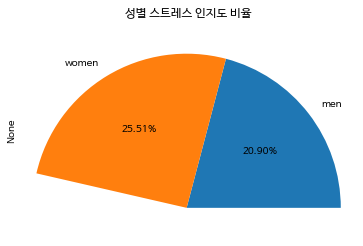

In [20]:
df_sex_st = df[df['mh_stress'] == 1].sex.value_counts()/sex
labels = ['men', 'women']
df_sex_st.plot.pie(labels = labels, autopct='%.2f%%')
plt.title("성별 스트레스 인지도 비율")
plt.axis('equal')
plt.show()

여성이 남성보다 스트레스 인지율, 우울증이 더 높습니다.

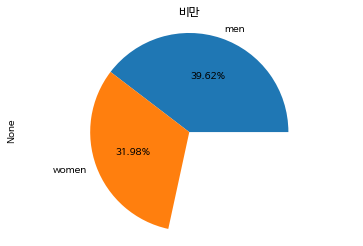

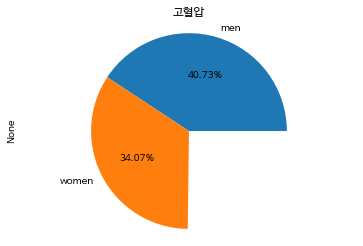

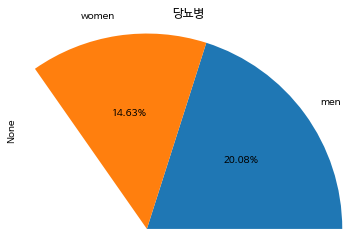

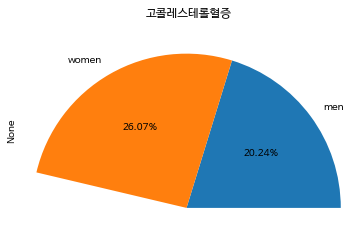

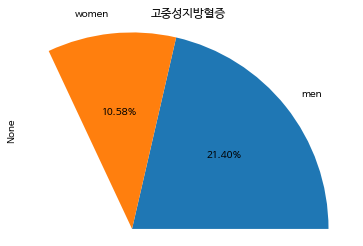

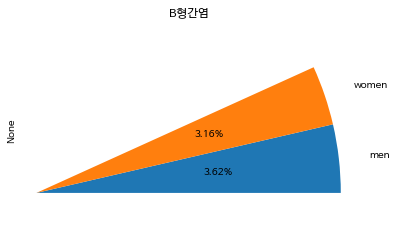

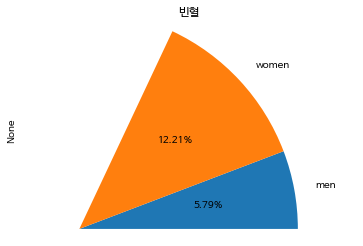

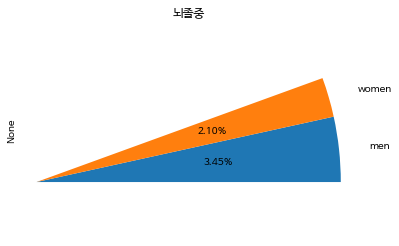

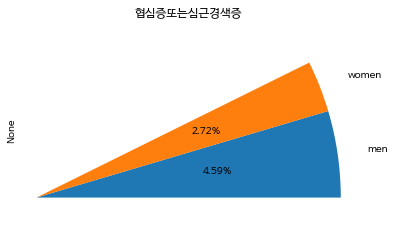

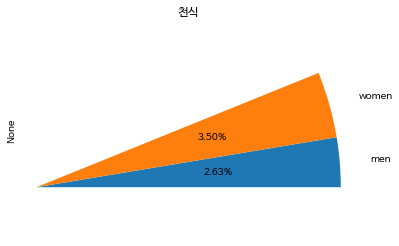

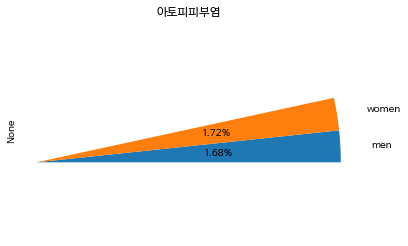

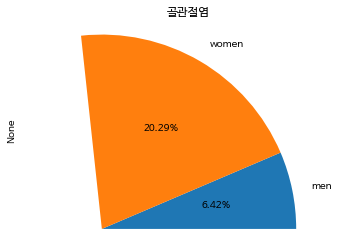

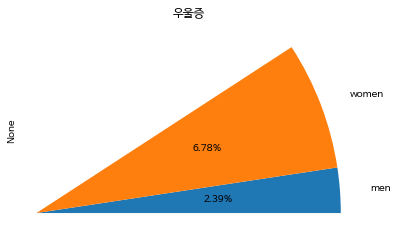

In [21]:
disease = ['비만','고혈압','당뇨병','고콜레스테롤혈증','고중성지방혈증','B형간염','빈혈','뇌졸중','협심증또는심근경색증','천식','아토피피부염','골관절염','우울증']
for i in range(len(disease)):
  feature = disease[i]
  df_sex_ds = df[df[feature] == 1].sex.value_counts()/sex
  df_sex_ds.plot.pie(labels = labels, autopct='%.2f%%')
  plt.title(disease[i])
  plt.axis('equal')
  plt.show()

남성: 비만, 고혈압, 당뇨병, 고중성지방혈증(2배), 협심증또는심근경색증(2배), 뇌졸중중                
여성: 고콜레스테롤혈증, 빈혈(2배), 천식, 골관절염(3배), 우울증(3배)



In [22]:
men['HE_TG'].mean()

155.64815321477428

In [23]:
women['HE_TG'].mean()

118.80156123566091

In [24]:
men[men['HE_TG']>400].HE_TG.value_counts()

564.0    6
402.0    6
417.0    6
437.0    6
447.0    6
        ..
927.0    1
943.0    1
494.0    1
617.0    1
504.0    1
Name: HE_TG, Length: 287, dtype: int64

In [25]:
women[women['HE_TG']>400].HE_TG.value_counts()

415.0     5
425.0     4
410.0     4
549.0     3
472.0     3
         ..
764.0     1
1437.0    1
695.0     1
894.0     1
925.0     1
Name: HE_TG, Length: 147, dtype: int64

In [34]:
df.loc[(df['HE_TG']<200), 'HE_TG']=1
df.loc[(df['HE_TG']<400)&(df['HE_TG']>=200), 'HE_TG']=2
df.loc[(df['HE_TG']>=400), 'HE_TG']=3

In [27]:
df['HE_TG']

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
35624    3.0
35625    3.0
35626    3.0
35627    3.0
35628    3.0
Name: HE_TG, Length: 35629, dtype: float64

In [39]:
df[df['sex']==2]['HE_TG'].value_counts()

1.0    20814
3.0      195
Name: HE_TG, dtype: int64

In [53]:
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    men = df[df['sex']==1][feature].value_counts()
    women = df[df['sex']==2][feature].value_counts()
    data = pd.DataFrame([men, women])
    data.index = ['men','women']
    data.plot(kind='bar',stacked=True)

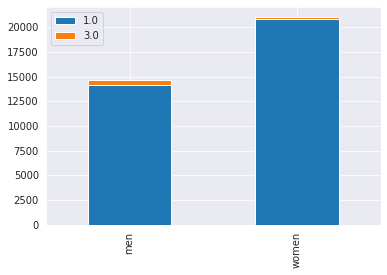

In [37]:
bar_chart('HE_TG')

남성이 여성보다 중성지방비율이 더 높음

In [55]:
df['N_FE']

0        17.112806
1        10.529593
2         5.174307
3         6.280085
4        15.331004
           ...    
35624    11.207944
35625     2.066313
35626     6.750061
35627    14.174227
35628     7.434020
Name: N_FE, Length: 35629, dtype: float64

## 전체 요인들간의 상관관계

In [56]:
columns = [ 'year',
 'region',
 'town_t',
 'sex',
 'age',
 'incm',
 'ho_incm',
 'incm5',
 'ho_incm5',
 'edu',
 'occp',
 'cfam',
 'genertn',
 'allownc',
 'marri_1',
 'marri_2',
 'fam_rela',
 'tins',
 'D_1_1',
 'educ',
 'EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1',
 'LW_mt',
 'LW_mt_a1',
 'LW_br',
 'HE_fst',
 'HE_HPdr',
 'HE_DMdr',
 'HE_mens',
 'HE_prg',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_HPfh3',
 'HE_HLfh1',
 'HE_HLfh2',
 'HE_HLfh3',
 'HE_IHDfh1',
 'HE_IHDfh2',
 'HE_IHDfh3',
 'HE_STRfh1',
 'HE_STRfh2',
 'HE_STRfh3',
 'HE_DMfh1',
 'HE_DMfh2',
 'HE_DMfh3',
 'HE_rPLS',
 'HE_sbp',
 'HE_dbp',
 'HE_ht',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_HDL_st2',
 'HE_TG',
 'HE_ast',
 'HE_alt',
 'HE_hepaB',
 'HE_HB',
 'HE_HCT',
 'HE_BUN',
 'HE_crea',
 'HE_WBC',
 'HE_RBC',
 'HE_Bplt',
 'HE_Uph',
 'HE_Unitr',
 'HE_Usg',
 'HE_Upro',
 'HE_Uglu',
 'HE_Uket',
 'HE_Ubil',
 'HE_Ubld',
 'HE_Uro',
 'HE_Ucrea',
 'N_INTK',
 'N_EN',
 'N_WATER',
 'N_PROT',
 'N_FAT',
 'N_CHO',
 'N_CA',
 'N_PHOS',
 'N_FE',
 'N_NA',
 'N_K',
 'N_CAROT',
 'N_RETIN',
 'N_B1',
 'N_B2',
 'N_NIAC',
 'N_VITC',
 '비만',
 '고혈압',
 '당뇨병',
 '고콜레스테롤혈증',
 '고중성지방혈증',
 'B형간염',
 '빈혈',
 '뇌졸중',
 '협심증또는심근경색증',
 '천식',
 '아토피피부염',
 '골관절염',
 '우울증']

In [57]:
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
year,1.000000,0.035958,-0.012849,-0.003767,0.030336,-0.002952,0.026841,-0.000656,0.090156,0.106246,...,0.105700,-0.036270,-0.007254,0.032889,0.636508,0.614545,0.615276,0.660066,0.417572,0.536234
region,0.035958,1.000000,0.416390,-0.013752,0.085797,-0.098251,-0.117874,-0.099236,-0.114447,-0.157963,...,-0.009467,-0.000263,0.010573,0.018360,0.010366,0.014259,0.016522,0.001116,0.034702,0.011607
town_t,-0.012849,0.416390,1.000000,-0.029691,0.153593,-0.102941,-0.157482,-0.103316,-0.155011,-0.219090,...,0.001840,0.014537,-0.000301,0.014594,-0.021424,-0.015661,-0.015515,-0.031567,0.026158,-0.019801
sex,-0.003767,-0.013752,-0.029691,1.000000,-0.033900,0.003784,-0.034544,0.004353,-0.031761,-0.133572,...,0.067412,-0.148975,-0.012652,0.107371,-0.018046,-0.023148,0.008789,0.000677,0.152204,0.077621
age,0.030336,0.085797,0.153593,-0.033900,1.000000,-0.000096,-0.418553,0.001530,-0.407480,-0.636589,...,0.195900,-0.008871,-0.025849,0.071904,0.057932,0.081621,0.029532,-0.025143,0.258273,0.031361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
협심증또는심근경색증,0.614545,0.014259,-0.015661,-0.023148,0.081621,-0.002552,-0.022161,-0.000407,0.008735,0.022720,...,0.097407,-0.019587,-0.009696,0.027874,0.774481,1.000000,0.743160,0.781635,0.527070,0.654916
천식,0.615276,0.016522,-0.015515,0.008789,0.029532,-0.013348,-0.007405,-0.010210,0.023623,0.042500,...,0.063246,-0.024429,-0.005491,0.013552,0.768274,0.743160,1.000000,0.794896,0.527347,0.658887
아토피피부염,0.660066,0.001116,-0.031567,0.000677,-0.025143,-0.004302,0.026368,-0.001985,0.059560,0.098015,...,0.056470,-0.017659,-0.005765,0.007919,0.815824,0.781635,0.794896,1.000000,0.534406,0.695865
골관절염,0.417572,0.034702,0.026158,0.152204,0.258273,-0.024528,-0.140449,-0.021972,-0.116637,-0.199271,...,0.132079,-0.020665,-0.017734,0.036741,0.532402,0.527070,0.527347,0.534406,1.000000,0.500231


In [58]:
df_corr["mh_stress"].sort_values()

age         -0.124649
occp        -0.075756
HE_BUN      -0.067581
allownc     -0.058162
BE5_1       -0.056744
               ...   
EC_pedu_2    0.072696
EC_wht_23    0.076261
우울증          0.098205
D_1_1        0.196751
mh_stress    1.000000
Name: mh_stress, Length: 120, dtype: float64

주관적 건강인지> 우울증> 주당 평균 근로시간> (성인)유년기환경: 아버지/어머니 교육수준

In [59]:
df_corr["EC_wht_23"].sort_values() #주당 평균근로시간

EC1_1       -0.713128
occp        -0.581434
age         -0.334668
sex         -0.294800
HE_prg      -0.294800
               ...   
BD2_31       0.283133
BD2_1        0.290316
HE_ht        0.316164
EC_wht_5     0.693002
EC_wht_23    1.000000
Name: EC_wht_23, Length: 120, dtype: float64

변형근로시간> 신장> 한번에 마시는 음주량> 폭음 빈도

In [60]:
df_corr["EC_pedu_1"].sort_values()

age         -0.550147
occp        -0.303556
고혈압         -0.263769
HE_sbp      -0.255224
HE_BUN      -0.223168
               ...   
ho_incm      0.351620
educ         0.554226
edu          0.557337
EC_pedu_2    0.787360
EC_pedu_1    1.000000
Name: EC_pedu_1, Length: 120, dtype: float64

교육수준 재분류 코드> 교육수준: 학력> 소득 4분위수(가구)

## 영양소, 질병을 제외한 요인들간의 상관관계

In [48]:
e_columns = ['sex','age','incm','ho_incm','incm5','ho_incm5','edu','occp','cfam','genertn','allownc','marri_1','marri_2','fam_rela','tins',
 'D_1_1','educ','EC1_1',
 'EC_wht_23',
 'EC_wht_5',
 'EC_pedu_1',
 'EC_pedu_2',
 'BD1_11',
 'BD2_1',
 'BD2_31',
 'dr_month',
 'BP6_10',
 'BP7',
 'mh_stress',
 'BS3_1',
 'BE3_31',
 'BE5_1']

In [49]:
df_e_small = df[e_columns]
df_e_corr = df_e_small.corr()
df_e_corr

,sex,age,incm,ho_incm,incm5,ho_incm5,edu,occp,cfam,genertn,...,BD1_11,BD2_1,BD2_31,dr_month,BP6_10,BP7,mh_stress,BS3_1,BE3_31,BE5_1
sex,1.000000,-0.033900,0.003784,-0.034544,0.004353,-0.031761,-0.133572,0.181449,0.005082,0.060553,...,-0.371780,-0.393053,-0.456393,-0.327431,-0.012242,-0.003884,0.053469,-0.671539,-0.017621,-0.200230
age,-0.033900,1.000000,-0.000096,-0.418553,0.001530,-0.407480,-0.636589,0.407456,-0.427049,-0.284201,...,-0.257075,-0.318519,-0.240488,-0.222718,0.007990,0.050679,-0.124649,0.046248,-0.012905,0.011702
incm,0.003784,-0.000096,1.000000,0.776660,0.948205,0.792757,0.211002,-0.157186,0.140574,0.125374,...,0.031856,0.032910,0.025783,0.036695,0.010224,-0.004404,-0.050778,-0.019822,0.056229,0.062380
ho_incm,-0.034544,-0.418553,0.776660,1.000000,0.787825,0.947673,0.487095,-0.340270,0.337166,0.256918,...,0.171395,0.196731,0.168010,0.153204,-0.002054,-0.006321,-0.006138,-0.001176,0.053349,0.074061
incm5,0.004353,0.001530,0.948205,0.787825,1.000000,0.799658,0.213456,-0.161885,0.141491,0.125700,...,0.029263,0.031696,0.024923,0.035894,0.010144,-0.006411,-0.054796,-0.021847,0.056301,0.065842
ho_incm5,-0.031761,-0.407480,0.792757,0.947673,0.799658,1.000000,0.490318,-0.343506,0.321132,0.243487,...,0.168059,0.193764,0.170818,0.152168,-0.004590,0.020325,-0.005549,-0.000748,0.054494,0.073086
edu,-0.133572,-0.636589,0.211002,0.487095,0.213456,0.490318,1.000000,-0.390941,0.319454,0.197173,...,0.215891,0.249452,0.220835,0.189972,-0.024228,0.010495,0.030800,0.076930,0.089709,0.104471
occp,0.181449,0.407456,-0.157186,-0.340270,-0.161885,-0.343506,-0.390941,1.000000,-0.181928,-0.110802,...,-0.203443,-0.248814,-0.234285,-0.185850,0.011487,-0.008529,-0.075756,-0.087290,0.008202,-0.033138
cfam,0.005082,-0.427049,0.140574,0.337166,0.141491,0.321132,0.319454,-0.181928,1.000000,0.771465,...,0.109904,0.118330,0.079809,0.090737,0.010622,-0.043631,0.055597,-0.024938,-0.003223,-0.014929
genertn,0.060553,-0.284201,0.125374,0.256918,0.125700,0.243487,0.197173,-0.110802,0.771465,1.000000,...,0.046438,0.059828,0.024417,0.033024,0.006036,-0.030725,0.057763,-0.049164,-0.010534,-0.024118


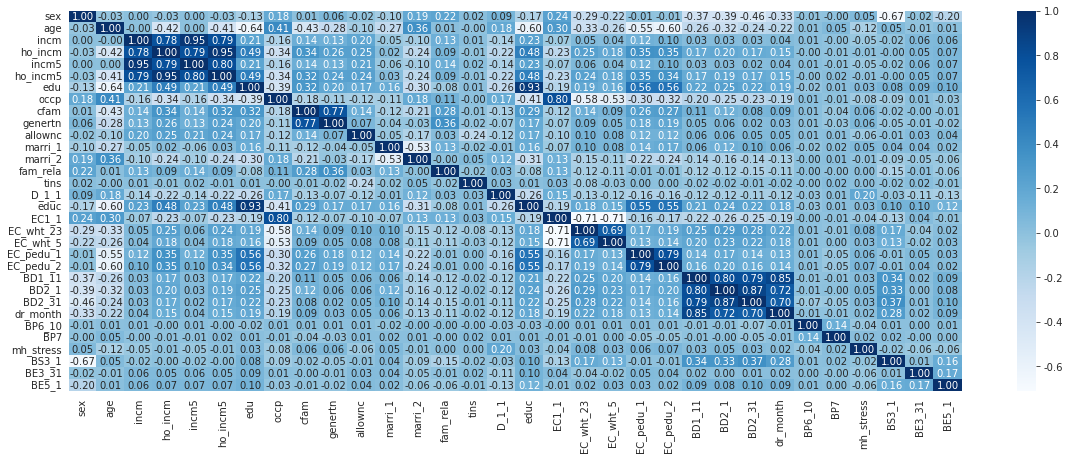

In [65]:
plt.figure(figsize=(20,7))
sns.heatmap(df_e_corr, annot=True, fmt=".2f", cmap="Blues")

In [50]:
df_e_corr["mh_stress"].sort_values()

age         -0.124649
occp        -0.075756
allownc     -0.058162
BE5_1       -0.056744
BE3_31      -0.056062
incm5       -0.054796
incm        -0.050778
EC1_1       -0.044554
BP6_10      -0.037605
BS3_1       -0.019093
marri_2     -0.014576
ho_incm     -0.006138
ho_incm5    -0.005549
fam_rela     0.003879
tins         0.004729
dr_month     0.017815
BP7          0.021702
BD1_11       0.027443
educ         0.027752
EC_wht_5     0.029842
edu          0.030800
BD2_31       0.032290
BD2_1        0.047457
marri_1      0.053241
sex          0.053469
cfam         0.055597
genertn      0.057763
EC_pedu_1    0.057904
EC_pedu_2    0.072696
EC_wht_23    0.076261
D_1_1        0.196751
mh_stress    1.000000
Name: mh_stress, dtype: float64

주관적 건강인지 > 변형근로시간 > (성인) 유년기환경: 어머니 교육수준 >(성인) 유년기환경: 아버지 교육수준

#고콜레스테롤혈증 원인 분석       

유전, 음식, 체중, 육제적 활동과 운동, 나이와 성별, 음주, 스트레스, 질병이나 약물


In [63]:
df_corr["고콜레스테롤혈증"].sort_values(ascending=False).head(20)

고콜레스테롤혈증      1.000000
HE_chol       0.229835
고혈압           0.198866
age           0.195900
HE_HbA1c      0.186934
당뇨병           0.169878
HE_wc         0.161051
HE_BMI        0.143941
HE_sbp        0.142465
HE_glu        0.133152
골관절염          0.132079
HE_BUN        0.115857
비만            0.109842
D_1_1         0.107092
year          0.105700
고중성지방혈증       0.099146
협심증또는심근경색증    0.097407
HE_alt        0.096619
occp          0.096173
HE_ast        0.091498
Name: 고콜레스테롤혈증, dtype: float64

총 콜레스테롤> 고혈압> 나이> 당화혈색소> 당뇨병> 허리둘레> 체질량지수> 최종 수축기 혈압> 공복혈당> 골관절염> 혈중요소질소> 비만